<h3 style="text-align: center;">EWA-EWC Johansen cointegration example</h3>

The johansen package is used to find a cointegrating relation between the ETFs EWA and EWC. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
from johansen import Johansen
import numpy as np

In [2]:
# Fitting dates.
start_date = '2016/02/01'
end_date = '2016/05/30'

prices_df = pickle.load(open('ewa_ewc_df.p', 'rb'))
prices_df = prices_df.sort_values(by='date').set_index('date')

x = prices_df.loc[start_date:end_date].as_matrix()
x_centered = x - np.mean(x, axis=0)

johansen = Johansen(x_centered, model=2, significance_level=0)
eigenvectors, r = johansen.johansen()

print "r values are: {}".format(r)

vec = eigenvectors[:, 0]
vec_min = np.min(np.abs(vec))
vec = vec / vec_min

print "The first cointegrating relation: {}".format(vec)

r values are: [1]
The first cointegrating relation: [ 1.50680004 -1.        ]


5.34485443902 0.473875870038


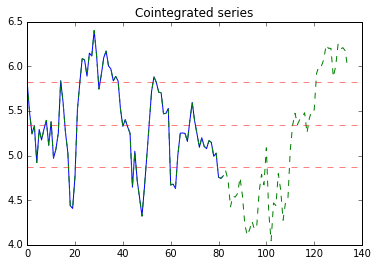

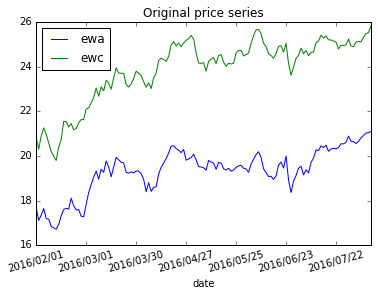

In [3]:
# Test dates.
start_date_test = start_date
end_date_test = '2016/08/11'

plt.title("Cointegrated series")

# In-sample plot.
portfolio_insample = np.dot(x, vec)
plt.plot(portfolio_insample, '-')

# Test plot. 
x_test = prices_df.loc[start_date_test:end_date_test].as_matrix()
portfolio_test = np.dot(x_test, vec)
plt.plot(portfolio_test, '--')

# In sample mean and std. 
in_sample = np.dot(x, vec)
mean = np.mean(in_sample)
std = np.std(in_sample)
print np.mean(in_sample), np.std(in_sample)

# Plot the mean and one std above and below it.
plt.axhline(y=mean - std, color='r', ls='--', alpha=.5)
plt.axhline(y=mean, color='r', ls='--', alpha=.5)
plt.axhline(y=mean + std, color='r', ls='--', alpha=.5)

plt.show()

# Plot of original price series.
prices_df.loc[start_date_test:end_date_test].plot(title="Original price series", rot=15)